<a href="https://colab.research.google.com/github/Yash-Wasalwar-07/TensorFlow-BootCamp/blob/main/Course-Notes/TensorFlow_Bootcamp_02_(Neural_Network_Classification_Binary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or the another.

A few types of classification problems:
* Binary
* Multiclass
* Multilabel

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [3]:
# Check out the fetures
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is litte hard to understand..
Let's visulize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "y":y})
circles.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


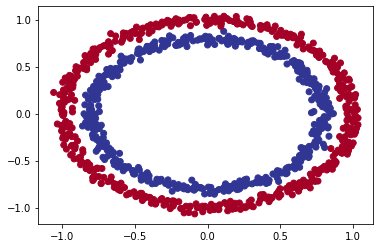

In [6]:
# Visualize the plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

# Input and Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
X[34], y[34]

(array([-0.08951582, -1.06776832]), 0)

# Steps in Modelling

The steps in modelling with TensorFlow are typically:

1. create or import a model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy..

So let's step things up a notch and add an extra layer

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X, y, epochs = 100, verbose = 0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

# Improving our Model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - add more layers, inc. no. of hidden units
2. Compiling a model - Here we might choose a different optimization function
3. Fitting the model - 

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100, verbose = 0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [16]:
model_3.predict(X)[:10]

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ]], dtype=float32)

In [17]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

To visualize our model's predictions, let's create a function `plot_decision_boundaries()`..

This function 
* Takes a trained model, features(X), and labels(y)
* Create a meshgrid of different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones 
(where 

In [18]:
import numpy as np
X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

(-1.1595024599098636, 1.1337117525463374)

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


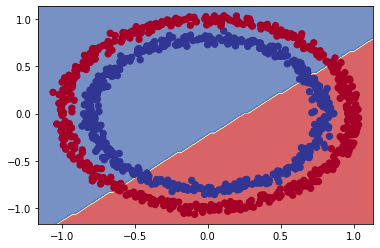

In [20]:
plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

In [21]:
nx, ny = (3, 2)
nx
x1 = np.linspace(0, 1, nx)
y1 = np.linspace(0, 1, ny)
x1, y1
# xv1, yv1 = np.meshgrid(x, y)
# xv1

(array([0. , 0.5, 1. ]), array([0., 1.]))

In [22]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

xx.shape

(100, 100)

In [23]:
yy

array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
        -1.16776832, -1.16776832],
       [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
        -1.14449789, -1.14449789],
       [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
        -1.12122747, -1.12122747],
       ...,
       [ 1.08946283,  1.08946283,  1.08946283, ...,  1.08946283,
         1.08946283,  1.08946283],
       [ 1.11273325,  1.11273325,  1.11273325, ...,  1.11273325,
         1.11273325,  1.11273325],
       [ 1.13600368,  1.13600368,  1.13600368, ...,  1.13600368,
         1.13600368,  1.13600368]])

In [24]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

In [25]:
xx.ravel()

array([-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
        1.11054797,  1.13371175])

In [26]:
yy.ravel()

array([-1.16776832, -1.16776832, -1.16776832, ...,  1.13600368,
        1.13600368,  1.13600368])

In [27]:
np.linspace(x_min, x_max, 100)

array([-1.15950246, -1.13633868, -1.1131749 , -1.09001112, -1.06684734,
       -1.04368356, -1.02051978, -0.997356  , -0.97419222, -0.95102844,
       -0.92786466, -0.90470088, -0.8815371 , -0.85837332, -0.83520954,
       -0.81204576, -0.78888198, -0.7657182 , -0.74255442, -0.71939064,
       -0.69622686, -0.67306308, -0.6498993 , -0.62673552, -0.60357174,
       -0.58040796, -0.55724418, -0.5340804 , -0.51091662, -0.48775284,
       -0.46458906, -0.44142528, -0.4182615 , -0.39509772, -0.37193394,
       -0.34877016, -0.32560638, -0.3024426 , -0.27927882, -0.25611504,
       -0.23295126, -0.20978748, -0.1866237 , -0.16345992, -0.14029614,
       -0.11713236, -0.09396858, -0.0708048 , -0.04764102, -0.02447724,
       -0.00131346,  0.02185032,  0.0450141 ,  0.06817788,  0.09134166,
        0.11450544,  0.13766922,  0.160833  ,  0.18399678,  0.20716056,
        0.23032434,  0.25348812,  0.2766519 ,  0.29981568,  0.32297946,
        0.34614324,  0.36930702,  0.39247079,  0.41563457,  0.43

In [28]:
y_pred = model_3.predict(x_in)
y_pred

array([[0.5062961 ],
       [0.50514215],
       [0.50398815],
       ...,
       [0.52109677],
       [0.51994264],
       [0.51878875]], dtype=float32)

In [29]:
y_pred = np.round(y_pred).reshape(xx.shape)


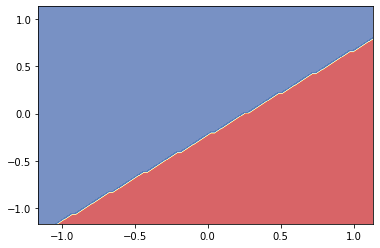

In [30]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

# The missing Piece : Non-Linearity

In [31]:
# Set the rndom seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

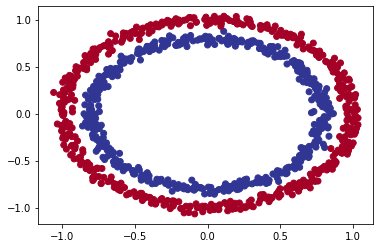

In [32]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

doing binary classifcation...


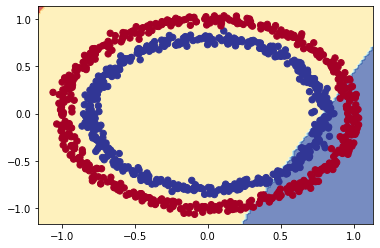

In [33]:
plot_decision_boundary(model = model_4,
                       X = X,
                       y = y)


Let's try build our first neural network with non linear functions

In [34]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation = "relu")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

In [35]:
# Time to replicate the multi-layer 
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1)
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

history = model_6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [36]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


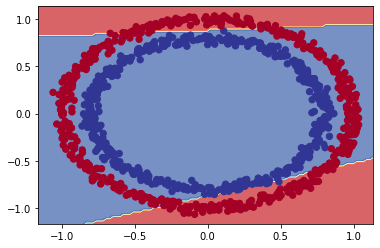

In [37]:
# How do our model predicrtions look
plot_decision_boundary(model_6, X, y)

In [38]:
# Creating model adding sigmoid activation function

# Set the random seed
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [39]:
# Evalute model_7
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


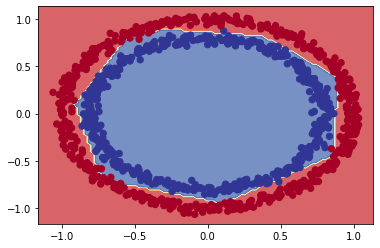

In [40]:
# Let's visualize our incridebile metrics
plot_decision_boundary(model_7, X, y)

**Question :** What's wrong with the predictions we have made? Are we really evaluating our model correctly? 

In [41]:
# Create a toy tensor 
A = tf.cast(tf.range(-10, 10), dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

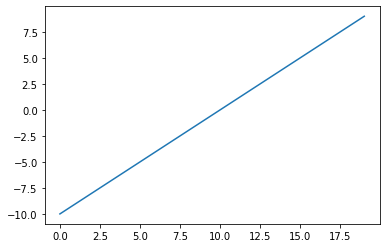

In [42]:
plt.plot(A)

In [43]:
# Let's start by replicating sigmoid -> sigmoid(x) = 1/1 + exp(-x)

def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

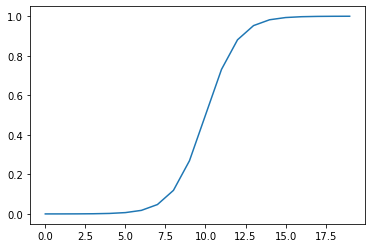

In [44]:
# Plot our toy tenosr
plt.plot(sigmoid(A))

In [45]:
def relu(x):
  return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

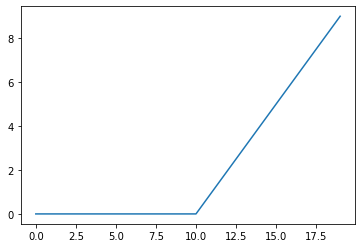

In [46]:
plt.plot(relu(A));

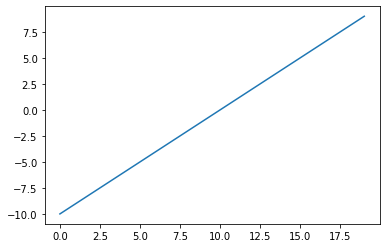

In [47]:
plt.plot(A)

In [48]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

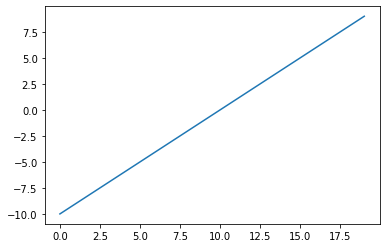

In [49]:
# DOes the linear activation function change anything
plt.plot(tf.keras.activations.linear(A))

In [50]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Improving our classification

So far we have been training and testing on the same dataset..
However, in ML it is a sin.


In [51]:
len(X)

1000

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [54]:
# Let's create a model

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6000
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5500
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5975
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.5987
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.5725
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6575
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6075
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6275
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7362
Epoch 11/25
25/25 [

In [55]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9950


[0.07264532893896103, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


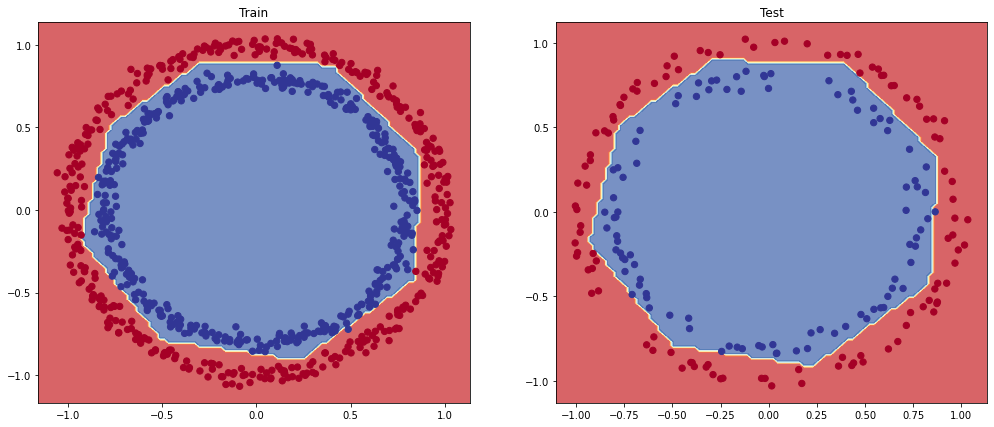

In [56]:
# Plot the decision boundary
plt.figure(figsize = (17, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X = X_train, y = y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show()

**📖 Resource:** Read the tf.keras.Model documentation and see the fit function.., what does it return...

In [57]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.682836,0.56000
1,0.679014,0.60000
2,0.672546,0.55000
3,0.666997,0.59750
4,0.662262,0.59875
5,0.656680,0.57250
6,0.648622,0.65750
7,0.642896,0.60750
8,0.625989,0.62750
9,0.604426,0.73625


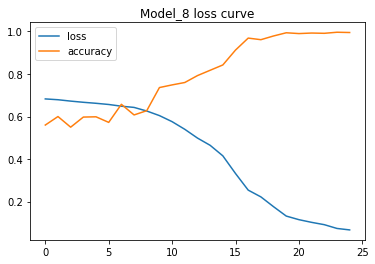

In [58]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve");

**Note** - For many problems, the loss function going down mens the model is improving!!

## FInding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrerases the most during training) we're going to use the `callback()`...

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

1. A learning rate callback.
  * You can think of a callback as an extra piece of functionality you can add to your model while its training.

2. Another model (we could use the same ones as above, we we're practicing building models here).

3. A modified loss curves plot.

In [59]:
#Create the model

tf.random.set_seed(42)

# model creation
model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr scheduler callback)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4888 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

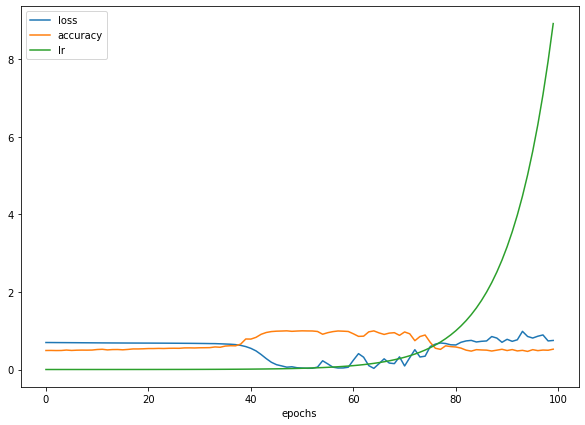

In [60]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10, 7), xlabel = "epochs")

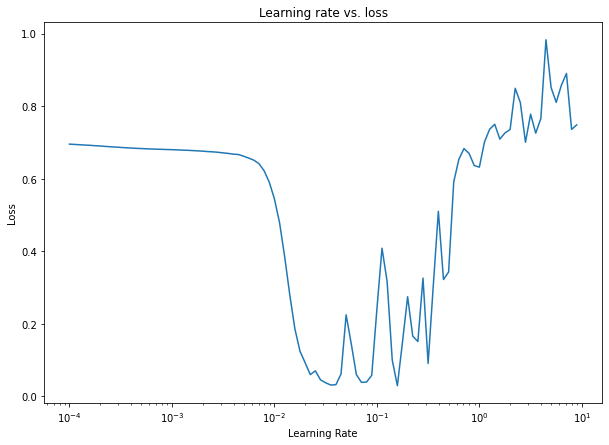

In [61]:
# # PLot the learning rate vs loss
# lrs = 1e-4 * (10 ** (np.arange(100)/2))
# plt.figure(figsize = (10,7))
# plt.semilogx(lrs, history_9.history["loss"])
# plt.xlabel("Learning rate")
# plt.ylabel("Loss")
# plt.title("Learning rate vs Loss")

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [62]:
(1/100 + 1/10)/2

0.055

In [63]:
1/10


0.1

In [64]:
0.055, 0.08

(0.055, 0.08)

In [65]:
0.077

0.077

In [66]:
# Let's try using higher ideal learning rate

tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation = "relu"),
            tf.keras.layers.Dense(4, activation = "relu"),
            tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.064),
                 metrics = ["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5537
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6162
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6488
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7250
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8138
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8988
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9638
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9725
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9725
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9725
Epoch 11/25
25/25 [

In [67]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9950


[0.02649141475558281, 0.9950000047683716]

In [68]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9950


[0.07264532893896103, 0.9950000047683716]

In [69]:
y_pred_10 = model_10.predict(X_test)
y_pred_10

array([[1.79597735e-03],
       [1.22180164e-01],
       [9.95748758e-01],
       [6.48302466e-06],
       [1.10337138e-03],
       [9.50127840e-04],
       [9.23914433e-01],
       [3.11977684e-01],
       [4.89857793e-03],
       [3.62966193e-06],
       [2.24652886e-03],
       [2.19812840e-01],
       [1.36401659e-05],
       [5.37404521e-05],
       [7.81825185e-03],
       [2.01433897e-04],
       [9.95748758e-01],
       [9.95748758e-01],
       [4.03187275e-02],
       [9.95748758e-01],
       [6.80831727e-06],
       [6.42240047e-04],
       [4.85157967e-03],
       [9.95748758e-01],
       [6.65853858e-01],
       [9.95748758e-01],
       [9.95748758e-01],
       [9.95748758e-01],
       [3.26633453e-04],
       [2.60883480e-05],
       [9.03699994e-01],
       [9.95748758e-01],
       [5.64306974e-04],
       [9.95748758e-01],
       [1.70569122e-02],
       [9.95748758e-01],
       [9.95748758e-01],
       [4.71891440e-07],
       [1.96269880e-07],
       [9.70476151e-01],


doing binary classifcation...
doing binary classifcation...


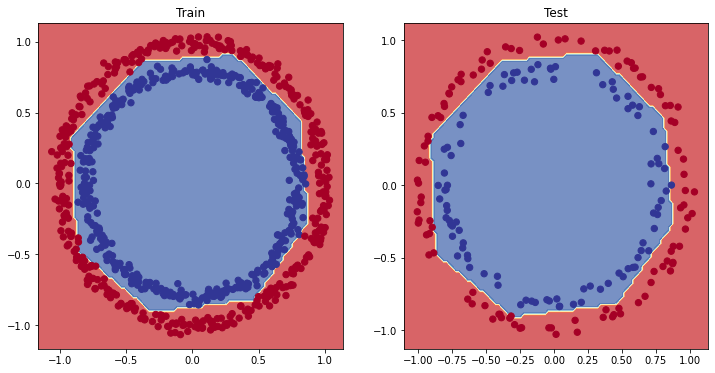

In [70]:
# Plot the decision boundaries 
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y = y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X = X_test, y = y_test)
plt.show()

## More classification evaluation methods

There are other evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report (from scikit-learn)



In [71]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set:  {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9950
Model loss on the test set: 0.02649141475558281
Model accuracy on the test set:  99.50%


How about confusion matrix ?

In [72]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

ValueError: ignored

In [73]:
y_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
y_preds[:10]

array([[1.79597735e-03],
       [1.22180164e-01],
       [9.95748758e-01],
       [6.48302466e-06],
       [1.10337138e-03],
       [9.50127840e-04],
       [9.23914433e-01],
       [3.11977684e-01],
       [4.89857793e-03],
       [3.62966193e-06]], dtype=float32)

Oops.. look like our predictions array hs come out on **prediction probability** form... the standard output from the sigmoid(or softmax) activation functions

In [77]:
# COnvert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [78]:
confusion_matrix(y_test, tf.round(y_preds))

array([[107,   0],
       [  1,  92]])

## Making our confusion matrix prettier

Let's prettify our confusion matrix...

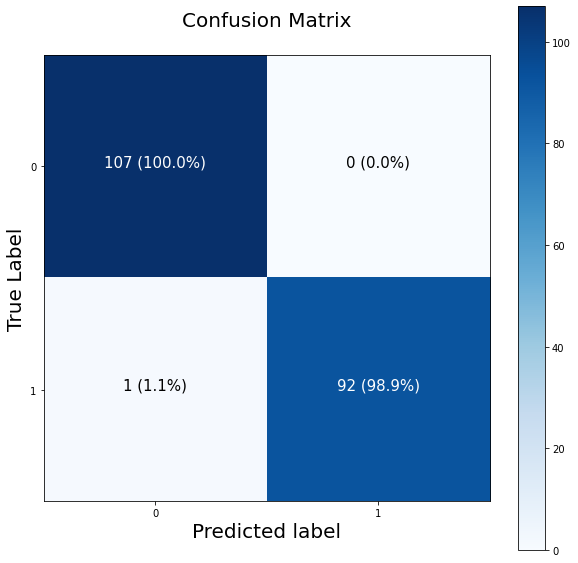

In [98]:
# Note:  the confusion mtrix code we're about to write is  remix of scikit-learn's plot confusion matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] #normalize our cm
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)

# Create matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)

fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [83]:
cm.sum(axis = 1)

array([107,  93])

In [85]:
cm.astype("float")

array([[107.,   0.],
       [  1.,  92.]])

In [86]:
cm.astype("float") / cm.sum(axis = 1)

array([[1.        , 0.        ],
       [0.00934579, 0.98924731]])

In [88]:
cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]

array([[1.        , 0.        ],
       [0.01075269, 0.98924731]])

In [92]:
cm / cm.sum(axis = 1)

array([[1.        , 0.        ],
       [0.00934579, 0.98924731]])

In [93]:
cm.shape

(2, 2)

In [99]:
def plot_confusion_matrix(y_true, y_pred):
  figsize = (10, 10)

  # Create the confusion matrix 
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] #normalize our cm
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  # Create matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)

  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

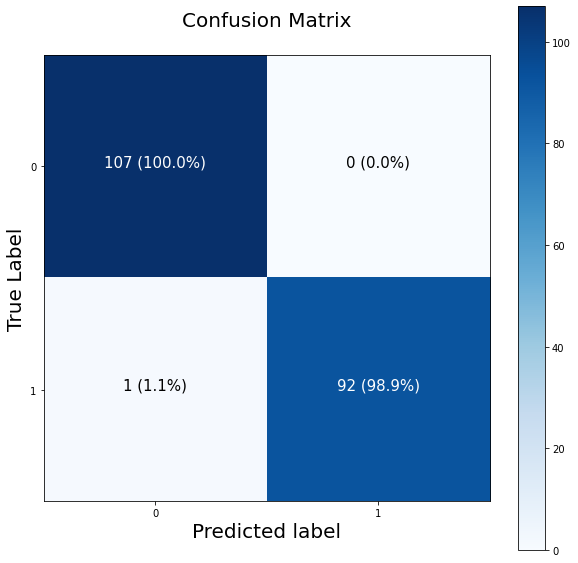

In [100]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_preds)

In [102]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()